# IBM Data Science Capstone Project

## Introduction

Hong Kong is a paradise for food lovers. It is famously known to be the culinary capital of Asia offering a wide variety of world's delicious food. In recent years, coffee culture has been brewing a storm and growing in popularity in Hong Kong. Hanging out in cafes became a popular trend among the younger generation. According to a market search, revenue in the coffee segment amounts to US$ 1,352 million in 2020 and the market is expected to grow annually by 8.1%. 

With consumers’ growing appreciation for coffee, more and more investors are motivated to open cafes in Hong Kong. In the brick-and-mortar retail world, it’s said that the three most important decisions you’ll make are location, location, and location. So putting the cafe in the proper location might be the single most important thing to do at startup. By using data science methods and machine learning techniques such as clustering, this project aims to identify the best location for running a cafe in Hong Kong.

## Business Problem

The main idea behind the project is to help investors to analyse the optimal location for opening cafes in Hong Kong. However, opening a cafe in Hong Kong can be challenging due to high rent. Also, most business districts are now being awash with coffee shops. Starting a cafe business in such an area could be very competitive and won’t be much profitable.Therefore, it is very important to find out the best possible neighborhood for opening a cafe.

## Data Source

We need the following data sources to extract the required information:

1. List of the districts of Hong Kong downloaded from: https://www.rvd.gov.hk/doc/tc/hkpr20/Appendix_TC.xlsx

2. Geo-coordinates of the districts generated via Geocoder API

3. Top Venues of districts data collected using Foursquare API

## Import libraries

In [1]:
# library to handle data in a vectorized manner
import numpy as np

# For data manipulation and analysis(Dataframe)
import pandas as pd

# Display full dataframe without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Extract data from Excel file
!pip install xlrd

# install and import geocoder
# !pip install geocoder
# import geocoder

# convert an address into latitude and longitude values
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="hk_explorer")

# library to handle JSON files
import json

# library to handle requests (Foursquare API to return results)
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium==0.5.0
import folium

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering
from sklearn.cluster import KMeans

# from sklearn import datasets
# from sklearn import metrics
# from scipy.spatial.distance import cdist

print("")
print("-------------Libraries imported!------------------")

Solving environment: done

# All requested packages already installed.


-------------Libraries imported!------------------


## Import Dataset

Hong Kong is divided into 18 Districts which are further divided into 127 sub-districts. The available dataset in the Government website is in Excel format. 

First, we import the Excel file **Appendix_TC.xlsx** that contains the 18 districts and the neighborhoods that exist in each district.

In [2]:
# Import dataset into Pandas Dataframe

hkn = pd.read_excel("https://www.rvd.gov.hk/doc/tc/hkpr20/Appendix_TC.xlsx", header = 4)
hkn.head()

,區 域 \nArea,地 區 \nDistrict,地 區 內 的 分 區 名 稱,Names of Sub-districts\nwithin District Boundaries,小 規 劃 統 計 區 \nTertiary Planning Units
0,NaN,NaN,NaN,NaN,NaN
1,港 島 \nHONG KONG,中 西 區 \nCentral and\nWestern,堅 尼 地 城 、 石 塘 咀 、\n西 營 盤 、 上 環 、\n中 環 、 金 鐘 、\n半 山 區 、 山 頂,"Kennedy Town, Shek Tong Tsui,\nSai Ying Pun, Sheung Wan,\nCentral, Admiralty,\nMid-levels, Peak","111, 112, 113, 114, 115, 116, \n121, 122, 123, 124(p), 141,\n142, 143, 181, 182"
2,NaN,灣 仔 \nWan Chai,灣 仔 、 銅 鑼 灣 、\n天 后 、 跑 馬 地 、 大 坑 、\n掃 桿 埔 、 渣 甸 山,"Wan Chai, Causeway Bay,\nTin Hau, Happy Valley, Tai Hang,\nSo Kon Po, Jardine's Lookout","124(p), 131, 132, 133, 134, 135, \n140, 144, 145, 146, 147, 148(p), \n149, 151(p), 152(p), 183, 184, \n190"
3,NaN,東 區 \nEastern,寶 馬 山 、 北 角 、\n鰂 魚 涌 、 西 灣 河 、\n筲 箕 灣 、 柴 灣 、 \n小 西 灣,"Braemar Hill, North Point,\nQuarry Bay, Sai Wan Ho,\nShau Kei Wan, Chai Wan,\nSiu Sai Wan","148(p), 151(p), 152(p), 153, \n154, 155, 156, 157, 158, 161, \n162, 163, 164, 165, 166, 167"
4,NaN,南 區 \nSouthern,薄 扶 林 、 香 港 仔 、 \n鴨 脷 洲 、 黃 竹 坑 、\n壽 臣 山 、 淺 水 灣 、\n舂 坎 角 、 赤 柱 、\n大 潭 、 石 澳,"Pok Fu Lam, Aberdeen,\nAp Lei Chau, Wong Chuk Hang, Shouson Hill, Repulse Bay,\nChung Hom Kok, Stanley,\nTai Tam, Shek O","171, 172, 173, 174, 175, 176, \n191, 192, 193, 194, 195, 196, \n197, 198"


In [3]:
hkn.shape

(39, 5)

## Data Cleaning

In [4]:
# Remove unrelated columns

del hkn ["區 域 \nArea"]
del hkn["地 區 內 的 分 區 名 稱"]
del hkn["小 規 劃 統 計 區 \nTertiary Planning Units"]
hkn.head()

,地 區 \nDistrict,Names of Sub-districts\nwithin District Boundaries
0,NaN,NaN
1,中 西 區 \nCentral and\nWestern,"Kennedy Town, Shek Tong Tsui,\nSai Ying Pun, Sheung Wan,\nCentral, Admiralty,\nMid-levels, Peak"
2,灣 仔 \nWan Chai,"Wan Chai, Causeway Bay,\nTin Hau, Happy Valley, Tai Hang,\nSo Kon Po, Jardine's Lookout"
3,東 區 \nEastern,"Braemar Hill, North Point,\nQuarry Bay, Sai Wan Ho,\nShau Kei Wan, Chai Wan,\nSiu Sai Wan"
4,南 區 \nSouthern,"Pok Fu Lam, Aberdeen,\nAp Lei Chau, Wong Chuk Hang, Shouson Hill, Repulse Bay,\nChung Hom Kok, Stanley,\nTai Tam, Shek O"


In [5]:
# Simplify the column name

hkn.rename(columns={"地 區 \nDistrict" : "District", 
                   "Names of Sub-districts\nwithin District Boundaries":"Neighborhood" } ,
          inplace = True)

hkn.head()

,District,Neighborhood
0,NaN,NaN
1,中 西 區 \nCentral and\nWestern,"Kennedy Town, Shek Tong Tsui,\nSai Ying Pun, Sheung Wan,\nCentral, Admiralty,\nMid-levels, Peak"
2,灣 仔 \nWan Chai,"Wan Chai, Causeway Bay,\nTin Hau, Happy Valley, Tai Hang,\nSo Kon Po, Jardine's Lookout"
3,東 區 \nEastern,"Braemar Hill, North Point,\nQuarry Bay, Sai Wan Ho,\nShau Kei Wan, Chai Wan,\nSiu Sai Wan"
4,南 區 \nSouthern,"Pok Fu Lam, Aberdeen,\nAp Lei Chau, Wong Chuk Hang, Shouson Hill, Repulse Bay,\nChung Hom Kok, Stanley,\nTai Tam, Shek O"


In [6]:
#Replace bogus \n with spacing from data

hkn = hkn.replace('\n',' ', regex=True)
hkn.head()
hkn.tail(15)

,District,Neighborhood
24,NaN,NaN
25,NaN,NaN
26,NaN,NaN
27,NaN,NaN
28,NaN,小 規 劃 統 計 區 Tertiary Planning Units
29,NaN,NaN
30,NaN,"113, 114, 115"
31,NaN,"121, 122, 123, 124"
32,NaN,"131, 132, 133, 134, 135, 144, 145, 146, 147, 149"
33,NaN,"151, 152, 153, 154, 155, 156, 157"


In [7]:
# to remove the empty rows (do not contain any data)
# check all rows if it is null (True = null, False = not null), store the result in df2

removed_elements = []
df2 = pd.isnull(hkn)
df2

,District,Neighborhood
0,True,True
1,False,False
2,False,False
3,False,False
4,False,False
5,True,True
6,True,True
7,False,False
8,False,False
9,False,False


In [8]:
# remove the rows if both District and Neighborhood are null

for n in range(len(hkn)) : 
    if df2.at[n,'District'] and df2.at[n, 'Neighborhood'] :
        removed_elements.append(n)
        
hkn.drop(removed_elements, axis = 0, inplace = True)

hkn

,District,Neighborhood
1,中 西 區 Central and Western,"Kennedy Town, Shek Tong Tsui, Sai Ying Pun, Sheung Wan, Central, Admiralty, Mid-levels, Peak"
2,灣 仔 Wan Chai,"Wan Chai, Causeway Bay, Tin Hau, Happy Valley, Tai Hang, So Kon Po, Jardine's Lookout"
3,東 區 Eastern,"Braemar Hill, North Point, Quarry Bay, Sai Wan Ho, Shau Kei Wan, Chai Wan, Siu Sai Wan"
4,南 區 Southern,"Pok Fu Lam, Aberdeen, Ap Lei Chau, Wong Chuk Hang, Shouson Hill, Repulse Bay, Chung Hom Kok, Stanley, Tai Tam, Shek O"
7,油 尖 旺 Yau Tsim Mong,"Tsim Sha Tsui, Yau Ma Tei, West Kowloon Cultural District, King's Park, Mong Kok, Tai Kok Tsui"
8,深 水 埗 Sham Shui Po,"Mei Foo, Lai Chi Kok, Cheung Sha Wan, Sham Shui Po, Shek Kip Mei, Yau Yat Tsuen, Tai Wo Ping, Stonecutters Island"
9,九 龍 城 Kowloon City,"Hung Hom, To Kwa Wan, Ma Tau Kok, Ma Tau Wai, Kai Tak, Kowloon City, Ho Man Tin, Kowloon Tong, Beacon Hill"
10,黃 大 仙 Wong Tai Sin,"San Po Kong, Wong Tai Sin, Tung Tau, Wang Tau Hom, Lok Fu, Diamond Hill, Tsz Wan Shan, Ngau Chi Wan"
11,觀 塘 Kwun Tong,"Ping Shek, Kowloon Bay, Ngau Tau Kok, Jordan Valley, Kwun Tong, Sau Mau Ping, Lam Tin, Yau Tong"
14,葵 青 Kwai Tsing,"Kwai Chung, Tsing Yi"


In [9]:
# Remove irrelevant multiple consecutive rows from line 28 to 35

hkn.drop([28, 30, 31, 32, 33, 34, 35], axis = 0, inplace = True)

In [10]:
# Remove Chinese characters in the dataframe

import string

printable = set(string.printable)
hkn['District'] = hkn['District'].apply(lambda row: ''.join(filter(lambda x: x in printable, row)))


In [11]:
hkn

,District,Neighborhood
1,Central and Western,"Kennedy Town, Shek Tong Tsui, Sai Ying Pun, Sheung Wan, Central, Admiralty, Mid-levels, Peak"
2,Wan Chai,"Wan Chai, Causeway Bay, Tin Hau, Happy Valley, Tai Hang, So Kon Po, Jardine's Lookout"
3,Eastern,"Braemar Hill, North Point, Quarry Bay, Sai Wan Ho, Shau Kei Wan, Chai Wan, Siu Sai Wan"
4,Southern,"Pok Fu Lam, Aberdeen, Ap Lei Chau, Wong Chuk Hang, Shouson Hill, Repulse Bay, Chung Hom Kok, Stanley, Tai Tam, Shek O"
7,Yau Tsim Mong,"Tsim Sha Tsui, Yau Ma Tei, West Kowloon Cultural District, King's Park, Mong Kok, Tai Kok Tsui"
8,Sham Shui Po,"Mei Foo, Lai Chi Kok, Cheung Sha Wan, Sham Shui Po, Shek Kip Mei, Yau Yat Tsuen, Tai Wo Ping, Stonecutters Island"
9,Kowloon City,"Hung Hom, To Kwa Wan, Ma Tau Kok, Ma Tau Wai, Kai Tak, Kowloon City, Ho Man Tin, Kowloon Tong, Beacon Hill"
10,Wong Tai Sin,"San Po Kong, Wong Tai Sin, Tung Tau, Wang Tau Hom, Lok Fu, Diamond Hill, Tsz Wan Shan, Ngau Chi Wan"
11,Kwun Tong,"Ping Shek, Kowloon Bay, Ngau Tau Kok, Jordan Valley, Kwun Tong, Sau Mau Ping, Lam Tin, Yau Tong"
14,Kwai Tsing,"Kwai Chung, Tsing Yi"


In [12]:
# to split the Neighborhood
#hkn = hkn.assign(Neighborhood=hkn['Neighborhood'].str.split(',')).explode('Neighborhood')


# The other method to split the Neighborhood

hkn = (hkn.set_index(hkn.columns.drop('Neighborhood',1).tolist())
 .Neighborhood.str.split(',', expand=True)
 .stack()
 .reset_index()
 .rename(columns={0:'Neighborhood'})
 .loc[:, hkn.columns]
)


In [13]:
hkn.head(20)

,District,Neighborhood
0,Central and Western,Kennedy Town
1,Central and Western,Shek Tong Tsui
2,Central and Western,Sai Ying Pun
3,Central and Western,Sheung Wan
4,Central and Western,Central
5,Central and Western,Admiralty
6,Central and Western,Mid-levels
7,Central and Western,Peak
8,Wan Chai,Wan Chai
9,Wan Chai,Causeway Bay


## Add Geo-coordinates to each district

Before we want to get the top venues data from Foursquare, we need to get the geo-coordinates of each district

In [14]:
# Get the coordinates of each Neighborhood
hkn["Coordinates"] = hkn["Neighborhood"].apply(geolocator.geocode)

# Use apply lambda function to get the latitude and longitude and store it in respective columns
hkn["Latitude"] = hkn["Coordinates"].apply(lambda x: x.latitude if x!= None else None)
hkn["Longitude"] = hkn["Coordinates"].apply(lambda x: x.longitude if x!= None else None)
hkn

,District,Neighborhood,Coordinates,Latitude,Longitude
0,Central and Western,Kennedy Town,"(堅尼地城 Kennedy Town, 士美菲路 Smithfield, 摩星嶺 Mount Davis, 堅尼地城 Kennedy Town, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.28131165, 114.12916039816602))",22.281312,114.129160
1,Central and Western,Shek Tong Tsui,"(石塘咀 Shek Tong Tsui, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.287735, 114.1345987))",22.287735,114.134599
2,Central and Western,Sai Ying Pun,"(西營盤 Sai Ying Pun, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.286121, 114.1420862))",22.286121,114.142086
3,Central and Western,Sheung Wan,"(上環 Sheung Wan, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2868701, 114.150267))",22.286870,114.150267
4,Central and Western,Central,"(Central, Venezuela, (9.577626, -68.42482001504955))",9.577626,-68.424820
5,Central and Western,Admiralty,"(Admiralty, Woodlands Avenue 7, Woodlands, Northwest, 738344, Singapore, (1.44056555, 103.80095814109688))",1.440566,103.800958
6,Central and Western,Mid-levels,"(半山區 Mid-Levels, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2824052, 114.145809))",22.282405,114.145809
7,Central and Western,Peak,"(Peak, Newberry County, South Carolina, 29122, United States of America, (34.237123, -81.32918665913238))",34.237123,-81.329187
8,Wan Chai,Wan Chai,"(灣仔 Wan Chai, 西環 Sai Wan, 香港島 Hong Kong Island, 灣仔區 Wan Chai District, 香港 Hong Kong, China 中国, (22.2790146, 114.1724833))",22.279015,114.172483
9,Wan Chai,Causeway Bay,"(銅鑼灣 Causeway Bay, 香港島 Hong Kong Island, 灣仔區 Wan Chai District, 香港 Hong Kong, China 中国, (22.280208, 114.1848407))",22.280208,114.184841


In [15]:
# Check if the dataframe contains any missing values
hkn.isnull().values.any()

True

In [16]:
hkn.isnull().sum()

District        0
Neighborhood    0
Coordinates     1
Latitude        1
Longitude       1
dtype: int64

In [17]:
hkn.at[124, "Neighborhood"] = "Tung Chung"
hkn.at[125, "Neighborhood"] = "Discovery Bay"

In [18]:
hkn.tail()

,District,Neighborhood,Coordinates,Latitude,Longitude
122,Islands,Peng Chau,"(坪洲 Peng Chau, 新界 New Territories, 離島區 Islands District, 香港 Hong Kong, China 中国, (22.2860717, 114.04437107281679))",22.286072,114.044371
123,Islands,Lantau Island,"(大嶼山 Lantau Island, 新界 New Territories, 離島區 Islands District, 香港 Hong Kong, NT, China 中国, (22.27146865, 113.94422320296745))",22.271469,113.944223
124,Islands,Tung Chung,None,NaN,NaN
125,Islands,Discovery Bay,"(Discovery Bay, CA 4, Trull, San Joaquin County, California, 94505, United States of America, (37.914773999999994, -121.59400523623853))",37.914774,-121.594005
126,Islands,Lamma Island,"(南丫島 Lamma Island, 新界 New Territories, 離島區 Islands District, 香港 Hong Kong, China 中国, (22.20944115, 114.14976738291259))",22.209441,114.149767


As we can see that the latitude and the longitude of some of the neighborhoods are obviously mistakenly located via Geocoder, we are going to add a new column called address.

In [19]:
# In case the district is not found via Geocoder, we can concatenate the neighborhood with the area to form a detailed address.
hkn["Address"] = hkn["Neighborhood"] + "," + "Hong Kong, China"

In [20]:
hkn.head()

,District,Neighborhood,Coordinates,Latitude,Longitude,Address
0,Central and Western,Kennedy Town,"(堅尼地城 Kennedy Town, 士美菲路 Smithfield, 摩星嶺 Mount Davis, 堅尼地城 Kennedy Town, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.28131165, 114.12916039816602))",22.281312,114.129160,"Kennedy Town,Hong Kong, China"
1,Central and Western,Shek Tong Tsui,"(石塘咀 Shek Tong Tsui, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.287735, 114.1345987))",22.287735,114.134599,"Shek Tong Tsui,Hong Kong, China"
2,Central and Western,Sai Ying Pun,"(西營盤 Sai Ying Pun, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.286121, 114.1420862))",22.286121,114.142086,"Sai Ying Pun,Hong Kong, China"
3,Central and Western,Sheung Wan,"(上環 Sheung Wan, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2868701, 114.150267))",22.286870,114.150267,"Sheung Wan,Hong Kong, China"
4,Central and Western,Central,"(Central, Venezuela, (9.577626, -68.42482001504955))",9.577626,-68.424820,"Central,Hong Kong, China"


In [21]:
# Check if the dataframe contains any missing values
hkn.isnull().values.any()

True

In [22]:
# Get the coordinates of each district
hkn["Coordinates"] = hkn["Address"].apply(geolocator.geocode)

# Use apply lambda function to get the latitude and longitude and store it in respective columns
hkn["Latitude"] = hkn["Coordinates"].apply(lambda x: x.latitude if x!= None else None)
hkn["Longitude"] = hkn["Coordinates"].apply(lambda x: x.longitude if x!= None else None)
hkn

,District,Neighborhood,Coordinates,Latitude,Longitude,Address
0,Central and Western,Kennedy Town,"(堅尼地城 Kennedy Town, 士美菲路 Smithfield, 摩星嶺 Mount Davis, 堅尼地城 Kennedy Town, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.28131165, 114.12916039816602))",22.281312,114.129160,"Kennedy Town,Hong Kong, China"
1,Central and Western,Shek Tong Tsui,"(石塘咀 Shek Tong Tsui, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.287735, 114.1345987))",22.287735,114.134599,"Shek Tong Tsui,Hong Kong, China"
2,Central and Western,Sai Ying Pun,"(西營盤 Sai Ying Pun, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.286121, 114.1420862))",22.286121,114.142086,"Sai Ying Pun,Hong Kong, China"
3,Central and Western,Sheung Wan,"(上環 Sheung Wan, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2868701, 114.150267))",22.286870,114.150267,"Sheung Wan,Hong Kong, China"
4,Central and Western,Central,"(中環 Central, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2813223, 114.1602579))",22.281322,114.160258,"Central,Hong Kong, China"
5,Central and Western,Admiralty,"(金鐘 Admiralty, 中環 Central, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2789208, 114.1644982))",22.278921,114.164498,"Admiralty,Hong Kong, China"
6,Central and Western,Mid-levels,"(半山區 Mid-Levels, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2824052, 114.145809))",22.282405,114.145809,"Mid-levels,Hong Kong, China"
7,Central and Western,Peak,"(山頂 The Peak, 西環 Sai Wan, 香港島 Hong Kong Island, 中西區 Central and Western District, 香港 Hong Kong, China 中国, (22.2699166, 114.1506667))",22.269917,114.150667,"Peak,Hong Kong, China"
8,Wan Chai,Wan Chai,"(灣仔 Wan Chai, 西環 Sai Wan, 香港島 Hong Kong Island, 灣仔區 Wan Chai District, 香港 Hong Kong, China 中国, (22.2790146, 114.1724833))",22.279015,114.172483,"Wan Chai,Hong Kong, China"
9,Wan Chai,Causeway Bay,"(銅鑼灣 Causeway Bay, 香港島 Hong Kong Island, 灣仔區 Wan Chai District, 香港 Hong Kong, China 中国, (22.280208, 114.1848407))",22.280208,114.184841,"Causeway Bay,Hong Kong, China"


In [23]:
# As we get all the coordinates of each neighborhood correctly, we may remove "Coordinates" and "Address" column now
del hkn["Coordinates"]
del hkn["Address"]

In [24]:
hkn

,District,Neighborhood,Latitude,Longitude
0,Central and Western,Kennedy Town,22.281312,114.129160
1,Central and Western,Shek Tong Tsui,22.287735,114.134599
2,Central and Western,Sai Ying Pun,22.286121,114.142086
3,Central and Western,Sheung Wan,22.286870,114.150267
4,Central and Western,Central,22.281322,114.160258
5,Central and Western,Admiralty,22.278921,114.164498
6,Central and Western,Mid-levels,22.282405,114.145809
7,Central and Western,Peak,22.269917,114.150667
8,Wan Chai,Wan Chai,22.279015,114.172483
9,Wan Chai,Causeway Bay,22.280208,114.184841


## Visualize neighborhoods on map 

We now visualize the center locations of each district. The map of Hong Kong is created with districts superimposed on top.

In [25]:
# The geodata for Hong Kong

address = "Hong Kong, China"

geolocator = Nominatim(user_agent="hk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong are 22.2793278, 114.1628131.


In [26]:
# create map of Hong Kong using latitude and longitude values
map_hongkong = folium.Map(location=[latitude, longitude], tiles = 'cartodbpositron', zoom_start=10)

# Folium supports displaying different tiles in the same map
tiles = ['cartodbpositron', 'openstreetmap']
for tile in tiles:
    folium.TileLayer(tile).add_to(map_hongkong)

# Add the layer control button at the top right hand side
folium.LayerControl().add_to(map_hongkong)

# add markers to map
for lat, lng, neighborhoods in zip(hkn['Latitude'], hkn['Longitude'], hkn['Neighborhood']):
    label = '{}'.format(neighborhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hongkong)  
    
map_hongkong

## Exploring Top Venues for each neighborhood with Foursquare API

#### Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'I0AVIIA5NFB1R5PB1FYFVRGM1NZ42CLK15IVDFFYKUJX1WTZ' # your Foursquare ID
CLIENT_SECRET = '1G4MRZXUS04SOYWMFTCZJP5KC5PGEDBSMWLFORMZD3D4UTUM' # your Foursquare Secret
VERSION = '20200522' # Date of Today

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I0AVIIA5NFB1R5PB1FYFVRGM1NZ42CLK15IVDFFYKUJX1WTZ
CLIENT_SECRET:1G4MRZXUS04SOYWMFTCZJP5KC5PGEDBSMWLFORMZD3D4UTUM


Let's examine the first neighorhood in the dataframe

In [28]:
hkn.loc[0, "Neighborhood"]

'Kennedy Town'

In [29]:
neighborhood_latitude = hkn.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = hkn.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = hkn.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Kennedy Town are 22.28131165, 114.12916039816602.


Getting the top 100 venues that are in I. Kennedy Town (First district) within a radius of 1000 meters. This will be obtained from Foursquare.


In [30]:
radius = 1000
LIMIT = 100

# Define the corresponding URL to get the venues data from Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=I0AVIIA5NFB1R5PB1FYFVRGM1NZ42CLK15IVDFFYKUJX1WTZ&client_secret=1G4MRZXUS04SOYWMFTCZJP5KC5PGEDBSMWLFORMZD3D4UTUM&v=20200522&ll=22.28131165,114.12916039816602&radius=1000&limit=100'

In [31]:
# Send the GET Request to Foursquare and the results will be returned in JSON format

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edfee73ad40e14f6465e8c3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sai Wan',
  'headerFullLocation': 'Sai Wan, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 125,
  'suggestedBounds': {'ne': {'lat': 22.290311659000007,
    'lng': 114.13886847158932},
   'sw': {'lat': 22.27231164099999, 'lng': 114.11945232474272}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5ac99cc067af3a34ce55398b',
       'name': 'Winstons Coffee',
       'location': {'address': 'Shop 8, G/F, The Hudson, 11 Davis St',
        'crossStreet': 'at Forbes St',
        'lat': 22.281374353854922,
        'lng': 114.12717152878096,
        '

In [32]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to tranform JSON file into a pandas dataframe

In [33]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Winstons Coffee,Coffee Shop,22.281374,114.127172
1,Little Creatures,Brewery,22.283950,114.128264
2,Sun Hing Restaurant (新興食家),Dim Sum Restaurant,22.283036,114.128209
3,Comptoir,French Restaurant,22.281209,114.126975
4,Catch.,Breakfast Spot,22.283152,114.126988
5,Chino,Mexican Restaurant,22.284037,114.128819
6,Kyo Japanese (京日本料理),Japanese Restaurant,22.281499,114.127110
7,Bresola,Italian Restaurant,22.283166,114.126902
8,AZIZA HK,Mediterranean Restaurant,22.282753,114.127365
9,The Cofftea Shop,Café,22.283018,114.126731


In [34]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Explore other neighborhoods

In [35]:
# Let's create a function to repeat the same process to all the neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'N_Latitude', 
                  'N_Longitude', 
                  'Venue', 
                  'V_Latitude', 
                  'V_Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
hk_venues = getNearbyVenues(names=hkn['Neighborhood'],
                            latitudes=hkn['Latitude'],
                            longitudes=hkn['Longitude']
                           )

Kennedy Town
 Shek Tong Tsui
 Sai Ying Pun
 Sheung Wan
 Central
 Admiralty
 Mid-levels
 Peak
Wan Chai
 Causeway Bay
 Tin Hau
 Happy Valley
 Tai Hang
 So Kon Po
 Jardine's Lookout
Braemar Hill
 North Point
 Quarry Bay
 Sai Wan Ho
 Shau Kei Wan
 Chai Wan
 Siu Sai Wan
Pok Fu Lam
 Aberdeen
 Ap Lei Chau
 Wong Chuk Hang
 Shouson Hill
 Repulse Bay
 Chung Hom Kok
 Stanley
 Tai Tam
 Shek O
Tsim Sha Tsui
 Yau Ma Tei
 West Kowloon Cultural District
 King's Park
 Mong Kok
 Tai Kok Tsui
Mei Foo
 Lai Chi Kok
 Cheung Sha Wan
 Sham Shui Po
 Shek Kip Mei
 Yau Yat Tsuen
 Tai Wo Ping
 Stonecutters Island
Hung Hom
 To Kwa Wan
 Ma Tau Kok
 Ma Tau Wai
 Kai Tak
 Kowloon City
 Ho Man Tin
 Kowloon Tong
 Beacon Hill
San Po Kong
 Wong Tai Sin
 Tung Tau
 Wang Tau Hom
 Lok Fu
 Diamond Hill
 Tsz Wan Shan
 Ngau Chi Wan
Ping Shek
 Kowloon Bay
 Ngau Tau Kok
 Jordan Valley
 Kwun Tong
 Sau Mau Ping
 Lam Tin
 Yau Tong
Kwai Chung
 Tsing Yi
Tsuen Wan
 Sheung Kwai Chung
 Ting Kau
 Sham Tseng
 Tsing Lung Tau
 Ma Wan
 Sunny B

In [38]:
print(hk_venues.shape)
hk_venues.head()

(3066, 7)


,Neighborhood,N_Latitude,N_Longitude,Venue,V_Latitude,V_Longitude,Venue Category
0,Kennedy Town,22.281312,114.12916,Winstons Coffee,22.281374,114.127172,Coffee Shop
1,Kennedy Town,22.281312,114.12916,Sun Hing Restaurant (新興食家),22.283036,114.128209,Dim Sum Restaurant
2,Kennedy Town,22.281312,114.12916,Comptoir,22.281209,114.126975,French Restaurant
3,Kennedy Town,22.281312,114.12916,Little Creatures,22.283950,114.128264,Brewery
4,Kennedy Town,22.281312,114.12916,Kyo Japanese (京日本料理),22.281499,114.127110,Japanese Restaurant


In [39]:
# Check if the dataframe contains any missing values
hk_venues.isnull().values.any()

False

Now, checking how many venues were collected for other districts as well.

In [40]:
hk_venues.groupby('Neighborhood').count()

,N_Latitude,N_Longitude,Venue,V_Latitude,V_Longitude,Venue Category
Neighborhood,,,,,,
Aberdeen,23,23,23,23,23,23
Admiralty,57,57,57,57,57,57
Ap Lei Chau,19,19,19,19,19,19
Beacon Hill,2,2,2,2,2,2
Causeway Bay,72,72,72,72,72,72
Central,99,99,99,99,99,99
Chai Wan,25,25,25,25,25,25
Cheung Muk Tau,1,1,1,1,1,1
Cheung Sha Wan,30,30,30,30,30,30


Checking how many distinct venue categories we have

In [41]:
print('There are {} uniques categories.'.format(len(hk_venues['Venue Category'].unique())))

There are 266 uniques categories.


## Analyzing the Districts

For that, we use one hot encoding.

In [42]:
# one hot encoding
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['Neighborhood'] = hk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot = hk_onehot[fixed_columns]

hk_onehot.head()

,Zoo,ATM,Accessories Store,African Restaurant,Airport Service,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baggage Locker,Bakery,Balinese Restaurant,Bank,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fujian Restaurant,Furniture / Home Store,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Store,Neighborhood,New American Restaurant,Non-Profit,Noodle House,Office,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Reservoir,Rest Area,Restaurant,River,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tibetan Restaurant,Toll Booth,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [43]:
hk_onehot.shape

(3066, 266)

Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [44]:
hk_grouped = hk_onehot.groupby('Neighborhood').mean().reset_index()
hk_grouped

,Neighborhood,Zoo,ATM,Accessories Store,African Restaurant,Airport Service,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baggage Locker,Bakery,Balinese Restaurant,Bank,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fujian Restaurant,Furniture / Home Store,Garden,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laundry Service,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Store,New American Restaurant,Non-Profit,Noodle House,Office,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Reservoir,Rest Area,Restaurant,River,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Sri Lankan Restaurant,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tibetan Restaurant,Toll Booth,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant
0,Aberdeen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.086957,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000

In [45]:
hk_grouped.shape

(123, 266)

The size of grouped dataframe is different from the neighborhood dataframe. Let's find out it.


In [46]:
missing_neighborhood = [i for i in hkn['Neighborhood'].unique() if i not in hk_grouped['Neighborhood'].unique()]

missing_neighborhood

[' Stonecutters Island', 'Tai Lam Chung', ' Pat Heung', ' Luk Keng']

The result shows that there are four places missing in the grouped dataframe. As far as we know, Stonecutters Island is a military port, while Tai Lam Chung is country park where famous for the Tai Lam Chung Reservoir. Pat Heung and Luk Keng are rural areas without business activities. Therefore, it is a good idea to exclude it from the dataset.

In [47]:
hkn = hkn[hkn['Neighborhood'] != 'Stonecutters Island']
hkn = hkn[hkn['Neighborhood'] != 'Tai Lam Chung']
hkn = hkn[hkn['Neighborhood'] != 'Pat Heung']
hkn = hkn[hkn['Neighborhood'] != 'Luk Keng']

In [48]:
hkn

,District,Neighborhood,Latitude,Longitude
0,Central and Western,Kennedy Town,22.281312,114.129160
1,Central and Western,Shek Tong Tsui,22.287735,114.134599
2,Central and Western,Sai Ying Pun,22.286121,114.142086
3,Central and Western,Sheung Wan,22.286870,114.150267
4,Central and Western,Central,22.281322,114.160258
5,Central and Western,Admiralty,22.278921,114.164498
6,Central and Western,Mid-levels,22.282405,114.145809
7,Central and Western,Peak,22.269917,114.150667
8,Wan Chai,Wan Chai,22.279015,114.172483
9,Wan Chai,Causeway Bay,22.280208,114.184841


In [49]:
# Print each neighborhood along with the top 5 most common venues.

num_top_venues = 5

for hood in hk_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hk_grouped[hk_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Aberdeen----
                venue  freq
0  Sushi Restaurant    0.09
1  Cha Chaan Teng      0.09
2  Park                0.09
3  Athletics & Sports  0.09
4  Thai Restaurant     0.04


---- Admiralty----
                venue  freq
0  Hotel               0.09
1  Café                0.09
2  Italian Restaurant  0.05
3  Park                0.05
4  Steakhouse          0.04


---- Ap Lei Chau----
                           venue  freq
0  Fast Food Restaurant           0.16
1  Chinese Restaurant             0.11
2  Shopping Mall                  0.11
3  Furniture / Home Store         0.11
4  Paper / Office Supplies Store  0.05


---- Beacon Hill----
                  venue  freq
0  Scenic Lookout        0.5 
1  Mountain              0.5 
2  Pier                  0.0 
3  Organic Grocery       0.0 
4  Other Great Outdoors  0.0 


---- Causeway Bay----
                 venue  freq
0  Japanese Restaurant  0.11
1  Sushi Restaurant     0.07
2  Chinese Restaurant   0.06
3  Hotel                0

Putting it into dataframe

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
# Create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hk_grouped['Neighborhood']

for ind in np.arange(hk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aberdeen,Athletics & Sports,Park,Cha Chaan Teng,Sushi Restaurant,River,Pharmacy,Coffee Shop,Chinese Restaurant,Shanghai Restaurant,Shopping Mall
1,Admiralty,Hotel,Café,Park,Italian Restaurant,Vietnamese Restaurant,Tea Room,Seafood Restaurant,Steakhouse,Yoga Studio,Juice Bar
2,Ap Lei Chau,Fast Food Restaurant,Furniture / Home Store,Shopping Mall,Chinese Restaurant,Grocery Store,Clothing Store,Pet Store,Paper / Office Supplies Store,Café,Burger Joint
3,Beacon Hill,Scenic Lookout,Mountain,Zhejiang Restaurant,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Court
4,Causeway Bay,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,Hotel,Dessert Shop,Supermarket,Szechuan Restaurant,Bookstore,Shopping Mall,Clothing Store


## Using Machine Learning for Clustering Neighborhoods

Let's find the optimal number of k for running k-means clustering by using the Elbow method. The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions). When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

### Using Elbow Method to find the optimal k

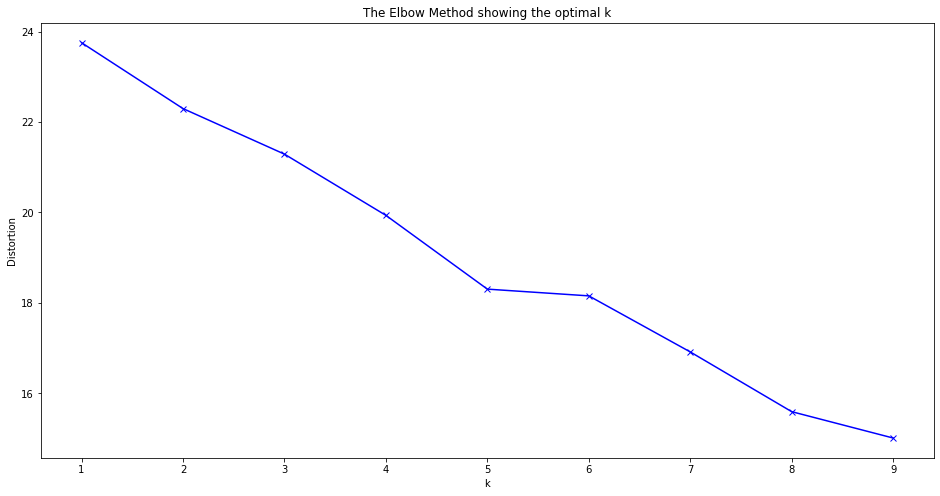

In [52]:
# Running K-Means with a range of k

hk_grouped_clustering = hk_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(hk_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

    
# Plotting the distortions of K-Means    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Using silhouette score to find the optimal k

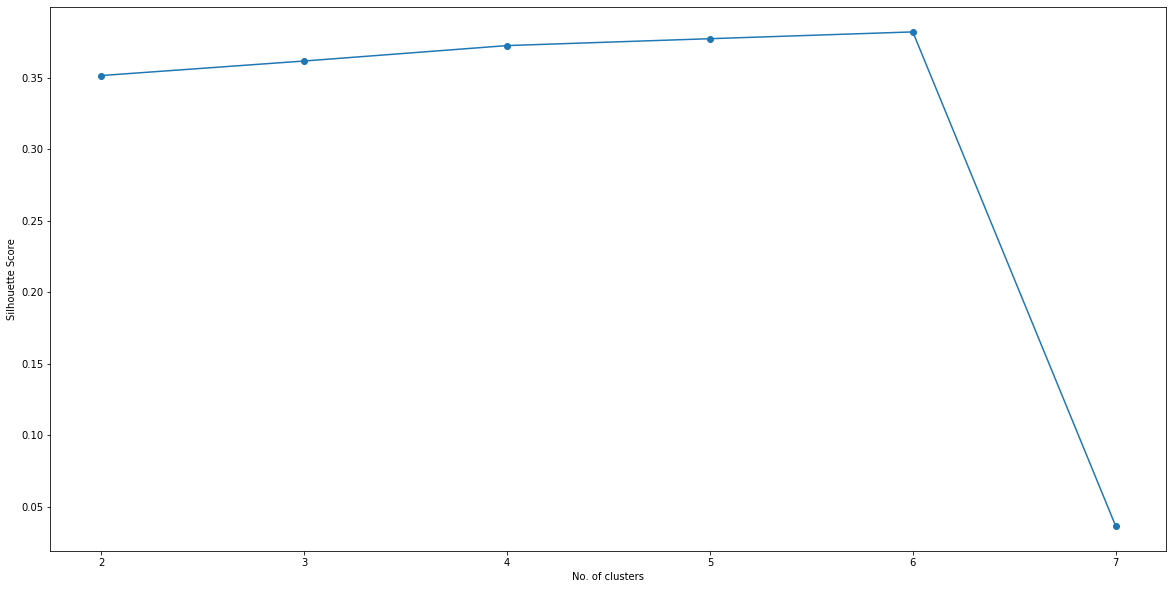

In [53]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()
    
    
max_range = 8

hk_grouped_clustering = hk_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = hk_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)


plot(max_range, scores, "No. of clusters", "Silhouette Score")


Based on this graph, we can see that the optimal number of clusters is 6.

### Run k-means to cluster the neighborhood into 6 clusters.

In [54]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 5, 1, 1], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood



In [55]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [56]:
hk_merged = hkn

hk_merged = hk_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hk_merged

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Kennedy Town,22.281312,114.129160,1.0,Japanese Restaurant,Coffee Shop,Vietnamese Restaurant,Hong Kong Restaurant,Mexican Restaurant,Chinese Restaurant,French Restaurant,Pizza Place,Café,Park
1,Central and Western,Shek Tong Tsui,22.287735,114.134599,1.0,Noodle House,Chinese Restaurant,Boxing Gym,Pier,Supermarket,Burger Joint,Furniture / Home Store,Spanish Restaurant,Café,Cantonese Restaurant
2,Central and Western,Sai Ying Pun,22.286121,114.142086,1.0,Coffee Shop,Hotel,French Restaurant,Chinese Restaurant,Burger Joint,Hotpot Restaurant,Noodle House,Hong Kong Restaurant,Tapas Restaurant,Park
3,Central and Western,Sheung Wan,22.286870,114.150267,1.0,Japanese Restaurant,Coffee Shop,Café,Italian Restaurant,French Restaurant,Chinese Restaurant,Bar,Thai Restaurant,Ramen Restaurant,Cocktail Bar
4,Central and Western,Central,22.281322,114.160258,1.0,Chinese Restaurant,Steakhouse,Lounge,Social Club,Sushi Restaurant,Gym / Fitness Center,French Restaurant,Coffee Shop,Bar,Gym
5,Central and Western,Admiralty,22.278921,114.164498,1.0,Hotel,Café,Park,Italian Restaurant,Vietnamese Restaurant,Tea Room,Seafood Restaurant,Steakhouse,Yoga Studio,Juice Bar
6,Central and Western,Mid-levels,22.282405,114.145809,1.0,Thai Restaurant,Coffee Shop,Japanese Restaurant,Tapas Restaurant,Café,Noodle House,Scandinavian Restaurant,Park,Seafood Restaurant,Rest Area
7,Central and Western,Peak,22.269917,114.150667,1.0,Scenic Lookout,Ice Cream Shop,Asian Restaurant,Monument / Landmark,Noodle House,Flower Shop,Sushi Restaurant,Fast Food Restaurant,Gift Shop,Grocery Store
8,Wan Chai,Wan Chai,22.279015,114.172483,1.0,Japanese Restaurant,Coffee Shop,Italian Restaurant,Café,Hotel,Cantonese Restaurant,Hong Kong Restaurant,Clothing Store,Lounge,Spanish Restaurant
9,Wan Chai,Causeway Bay,22.280208,114.184841,1.0,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,Hotel,Dessert Shop,Supermarket,Szechuan Restaurant,Bookstore,Shopping Mall,Clothing Store


In [57]:
# Check if the dataframe contains any missing values
hk_merged.isnull().values.any()

True

In [58]:
hk_merged.isnull().sum()

District                  0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            3
1st Most Common Venue     3
2nd Most Common Venue     3
3rd Most Common Venue     3
4th Most Common Venue     3
5th Most Common Venue     3
6th Most Common Venue     3
7th Most Common Venue     3
8th Most Common Venue     3
9th Most Common Venue     3
10th Most Common Venue    3
dtype: int64

In [59]:
hk_merged.drop([45, 93, 99], axis = 0, inplace = True)

In [60]:
hk_merged["Cluster Labels"] = hk_merged["Cluster Labels"].astype(int)

Now, visualizing the clusters

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hk_merged['Latitude'], hk_merged['Longitude'], hk_merged['Neighborhood'], hk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

### Cluster 1

In [62]:
hk_merged.loc[hk_merged['Cluster Labels'] == 0, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Shouson Hill,Trail,Café,Grocery Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food & Drink Shop,Garden,Food
92,Shek Kong,Trail,Farm,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Gastropub
100,Wu Kau Tang,Trail,Other Great Outdoors,Waterfall,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Fujian Restaurant,Food & Drink Shop,Electronics Store
122,Peng Chau,Scenic Lookout,Trail,Harbor / Marina,Flea Market,English Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food
123,Lantau Island,Trail,Food,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Gastropub


### Cluster 2

In [63]:
hk_merged.loc[hk_merged['Cluster Labels'] == 1, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kennedy Town,Japanese Restaurant,Coffee Shop,Vietnamese Restaurant,Hong Kong Restaurant,Mexican Restaurant,Chinese Restaurant,French Restaurant,Pizza Place,Café,Park
1,Shek Tong Tsui,Noodle House,Chinese Restaurant,Boxing Gym,Pier,Supermarket,Burger Joint,Furniture / Home Store,Spanish Restaurant,Café,Cantonese Restaurant
2,Sai Ying Pun,Coffee Shop,Hotel,French Restaurant,Chinese Restaurant,Burger Joint,Hotpot Restaurant,Noodle House,Hong Kong Restaurant,Tapas Restaurant,Park
3,Sheung Wan,Japanese Restaurant,Coffee Shop,Café,Italian Restaurant,French Restaurant,Chinese Restaurant,Bar,Thai Restaurant,Ramen Restaurant,Cocktail Bar
4,Central,Chinese Restaurant,Steakhouse,Lounge,Social Club,Sushi Restaurant,Gym / Fitness Center,French Restaurant,Coffee Shop,Bar,Gym
5,Admiralty,Hotel,Café,Park,Italian Restaurant,Vietnamese Restaurant,Tea Room,Seafood Restaurant,Steakhouse,Yoga Studio,Juice Bar
6,Mid-levels,Thai Restaurant,Coffee Shop,Japanese Restaurant,Tapas Restaurant,Café,Noodle House,Scandinavian Restaurant,Park,Seafood Restaurant,Rest Area
7,Peak,Scenic Lookout,Ice Cream Shop,Asian Restaurant,Monument / Landmark,Noodle House,Flower Shop,Sushi Restaurant,Fast Food Restaurant,Gift Shop,Grocery Store
8,Wan Chai,Japanese Restaurant,Coffee Shop,Italian Restaurant,Café,Hotel,Cantonese Restaurant,Hong Kong Restaurant,Clothing Store,Lounge,Spanish Restaurant
9,Causeway Bay,Japanese Restaurant,Sushi Restaurant,Chinese Restaurant,Hotel,Dessert Shop,Supermarket,Szechuan Restaurant,Bookstore,Shopping Mall,Clothing Store


### Cluster 3

In [64]:
hk_merged.loc[hk_merged['Cluster Labels'] == 2, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Kai Tak,Tunnel,Metro Station,Zhejiang Restaurant,Flower Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,English Restaurant
72,Tsing Yi,Tunnel,Zhejiang Restaurant,Food,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,English Restaurant


### Cluster 4

In [65]:
hk_merged.loc[hk_merged['Cluster Labels'] == 3, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
114,Clear Water Bay,Harbor / Marina,Boat or Ferry,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Zhejiang Restaurant
117,Tseung Kwan O,Harbor / Marina,Zhejiang Restaurant,English Restaurant,Fujian Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food & Drink Shop,Food


### Cluster 5

In [66]:
hk_merged.loc[hk_merged['Cluster Labels'] == 4, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
89,San Tin,Electronics Store,English Restaurant,Furniture / Home Store,Fujian Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food & Drink Shop,Food


### Cluster 6

In [67]:
hk_merged.loc[hk_merged['Cluster Labels'] == 5, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
106,Cheung Muk Tau,Supermarket,Zhejiang Restaurant,English Restaurant,Fujian Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Court,Food & Drink Shop,Food


## Conclusion

By looking at the cluster data, we can see that cluster 2 is the one that we are the most interested in. The majority of the most common venues are food and restaurant. To find the optimal location for running a coffee shop, we can conclude that the best location is indicated in cluster 2. 

The rest of the clutsters shows their local specialties in the districts: 

Cluster 1: Trail and scenic lookout

Cluster 3: Tunnel

Cluster 4: Harbor / Marina

Cluster 5: Electronics store

Cluster 6: Supermarket

We will look into the details of the cluster 2 to see which neighborhood is the best location for running a coffee shop. The details as well as the conclusion will be included in the report.